## What is a name?

**Name** (also called identifier) is simply **a name given to objects**. Everything in Python is an object. Name is a way to access the underlying object.

For example, when we do the assignment a = 2, here 2 is an object stored in memory and a is the name we associate it with [4]. We can get the address (in heap memory) of some object through the built-in function, id(). 

Let's check it.

In [3]:
a = 2
print('hex(id(2)) =', hex(id(2)))

print('hex(id(a)) =', hex(id(a)))

hex(id(2)) = 0x55ca0c1ab440
hex(id(a)) = 0x55ca0c1ab440


Here, both refer to the same object. Let's make things a little more interesting.

In [5]:
a = 2
print('id(a) =', id(a))

a = a+1
print('id(a) =', id(a))
print('id(3) =', id(3))

b = 2
print('id(2) =', id(2))
print('id(b) =', id(b))

id(a) = 94326274831424
id(a) = 94326274831456
id(3) = 94326274831456
id(2) = 94326274831424
id(b) = 94326274831424


What is happening in the above sequence of steps? A diagram will help us explain this.

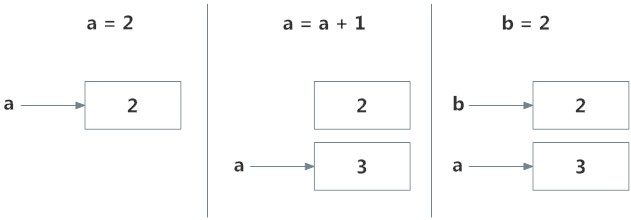

Initially, an object 2 is created and the name a is associated with it, when we do a = a+1, a new object 3 is created and now a associates with this object.

Note that id(a) and id(3) have same values.

Furthermore, when we do b = 2, the new name b gets associated with the previous object 2.

This is efficient as Python doesn't have to create a new duplicate object. This **dynamic binding** makes Python powerful; a name could refer to any type of object.

In [6]:
a = 5
a = 'Hello world'
a = [1,2,3]

All these are valid and a will refer to three different types of object at different instances. Functions are objects too, so a name can refer to them as well.

In [7]:
def printHello():
    print("Hello")     
a = printHello

# Output: Hello
a()

Hello


Our same name a can refer to a function and we can call the function through it, pretty neat.

## What is a namespace in Python?

So now that we understand what names are, we can move on to the concept of namespaces.

To simply put it, namespace is a collection of names.

In Python, you can imagine a namespace as a mapping of every name to its corresponding object. **Namespace is the set of name:object pairs**

Different namespaces can co-exist at a given time but are completely isolated. For example, in a deeply nested function calls, each local namespace (i.e. corresponding to each symbol table / frame) is isolated from each other as well as from global namespace.

### Builtins module is added to the global symbol table of your myscript.py

A namespace containing all the built-in names is created when we start the Python interpreter and exists as long we don't exit. Consider a .py script being invoked via 'python myscript.py' :

**print(globals())**  # inside myscript.py

returns global symbol table / global frame

In [10]:
# {..., '__name__': '__main__', '__builtins__': <module 'builtins' (built-in)>}

**"Modules can import other modules. The imported module names are placed in the importing module’s global symbol table."** [2]

[10] and [2] implies that Python automatically imports the builtins module upon its invocation at command line:

python myscript.py

Python does inside myscript.py automatically:

In [1]:
# in myscript.py
import builtins

This is the reason that built-in functions like id(), print() etc. are always available to us from any part of the program.

### Running a module/an app via command prompt 'python my_module.py'

When a module is run, its global code is to be executed by Python. Before execution, an empty global symbol table (i.e. {}) is created. As the global code executes, global names, global functions and classes are added to it. The global symbol table for that module can be accessed by calling **globals()** [2]

When a function is invoked, an empty local symbol table (i.e. {}) is created . As the function code starts to execute, local names, functions and classes are added to it. The local symbol table can be accessed by calling **locals()** in the function [2]

Below given a code example:

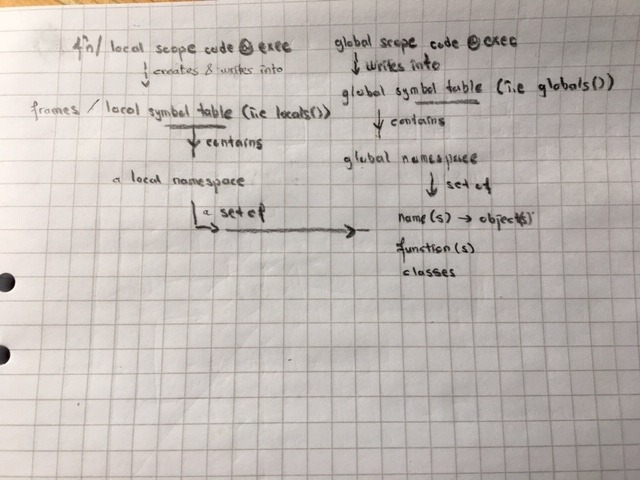

In [ ]:
# 06-Modules and Packages/Locals/locals.py
# GST: Global Symbol Table
# LST: Local Symbol Table

print(globals())   # GST: {..., '__name__': '__main__', '__builtins__': <module 'builtins' (built-in)>}
def outer_function():
    print(locals())  # a should not be in local symbol table at this point; LST = {}
    a = 20           # local symbol table is being modified with the addition of a referring to 2
    print(locals())  # a is added to the local symbol table at this point; LST: {'a': 20}

    class A:
        pass

    def inner_function():
        print(locals())  # a should not be in local symbol table at this point; LST = {}
        a = 30
        print(locals())  # a is added to the local symbol table at this point; LST = {'a': 30}
        print('a =', a)

    print(locals())
    #   LST = {'a': 20, 'A': <class '__main__.outer_function.<locals>.A'>,
    # '   inner_function': <function outer_function.<locals>.inner_function at 0x7f3ce1799ea0>}
    inner_function()
    print('a =', a)  # 20

print(globals())
# GST= {..., '__name__': '__main__', '__builtins__': <module 'builtins' (built-in)>,
#  'outer_function': <function outer_function at 0x7f5e2cde1ea0>}
a = 10
print(globals())
# GST = {..., '__name__': '__main__', '__builtins__': <module 'builtins' (built-in)>,
#  'outer_function': <function outer_function at 0x7f5e2cde1ea0>, 'a': 10}
outer_function()
print('a =', a) # 10

### Importing modules within another .py file

When a module is imported, its global code is to be executed by Python. Before execution, an empty global symbol table (i.e. {}) is created. As the global code executes, names functions and classes in the global scope are added to it. The global symbol table for that module can be accessed by calling **module_name.variable_name** in the importing application.

When a function is invoked within an imported module, an empty local symbol table (i.e. {}) is created . As the function code starts to execute, names, functions and classes in the local scope are added to it. The local symbol table can be accessed by calling **locals()** in the function

Each module has its own private symbol table, which is used as the global symbol table by all functions defined in the module. Thus, the author of a module can use global variables in the module without worrying about accidental clashes with a user’s global variables. On the other hand, if you know what you are doing you can touch a module’s global variables with the same notation used to refer to its functions, modname.itemname [3]

 The imported module names are placed in the importing module’s global symbol table.[3]

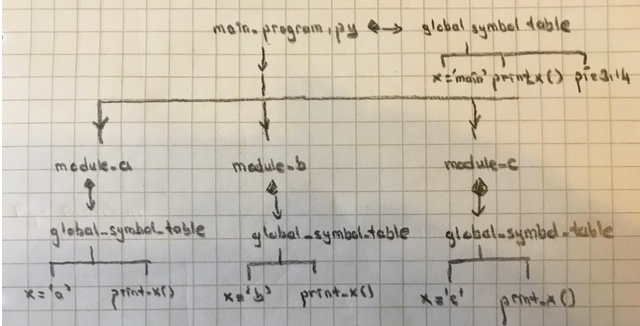

Referring to the image above, consider the following modules and main_program.py:
Refer to (06-Modules And Packages\MultipleGlobalNamespacesWithNameX)

In [24]:
# In module_a.py
# x local to module_a
x = 'a'


def print_x():
    print(f'In module_a, x is {x}')


if __name__ == 'module_a':  # if module_a is imported by main_program.py
    print_x()

In [25]:
# In module_b.py
# x is local to module_b
x = 'b'


def print_x():
    print(f'In module_b, x is {x}')

In [26]:
# In module_c.py
# x is local to module_c
x = 'c'


def print_x():
    print(f'In module_c, x is {x}')

In [ ]:
# In main_program.py
from math import pi  # pi is imported directly into main_program's global symbol table! Proof: line 20 & [3]
import module_a      # module_a is added to global symbol table of main_program.py
import module_b      # module_b is added to global symbol table of main_program.py
import module_c      # module_c is added to global symbol table of main_program.py

# x is local to main_program.py
x = 'main'


def print_x():
    print(f'In main_program, x is {x}')


print_x()           # prints: In main_program, x is main
module_a.print_x()  # prints: In module_a, x is a
module_b.print_x()  # prints: In module_b, x is b
module_c.print_x()  # prints: In module_c, x is c

print(pi)           # 3.141592653589793
print(globals())  # { ..., 'pi': 3.141592653589793, ...}

## When imported multiple times the same module, the module's code is run only once!

Acc.to [5]: "The first time a module is loaded into a running Python script, it is initialized by executing the code in the module once. If another module in your code imports the same module again, it will not be loaded twice but once only - so local variables inside the module act as a "singleton" - they are initialized only once."

Below given a code example for this:
Refer to 06-Modules And Packages/ModulesAreInitializedOnlyOnceWhenImported/

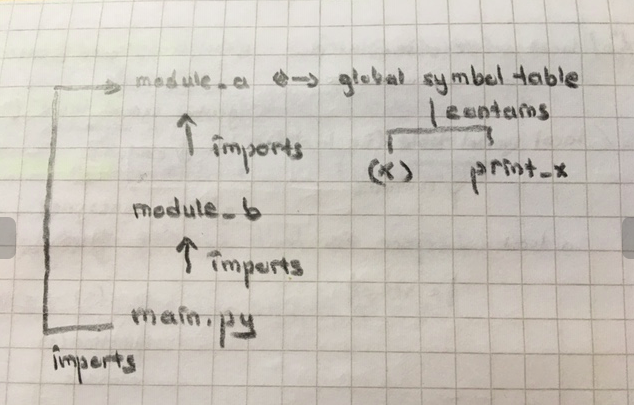

In [2]:
# in module_a.py
def print_x():
    return x


if __name__ == 'module_a':  # if module_a is imported
    if 'x' in globals():
        x += 1  # if module_a is imported multiple times, would this code be run from 2.nd importing onwards?
    else:  # x is not in globals()
        x = 1  # module_a is loaded for the first time, initialize it to 1

In [ ]:
# in module_b.py
import module_a

print(f'Module_b imported module_a. x in module_a is {module_a.print_x()}')  # prints x has 1

In [ ]:
# in main.py
import module_b
import module_a  # note that module_b has already imported module_a, x is already initialized to 1 there


if __name__ == '__main__':
    print(f'main.py has also imported module_a. The value of x in module_a is {module_a.print_x()}')

In [ ]:
When 'python main.py' is executed:

Module_b imported module_a. x in module_a is 1
main.py has also imported module_a. The value of x in module_a is 1

## Python Variable Scope

Although there are various unique namespaces defined, we may not be able to access all of them from every part of the program. The concept of scope comes into play.

Scope is the portion of the program from where a namespace can be accessed directly without any prefix.

Read more about scopes here:
http://localhost:8888/notebooks/1-Python/Complete-Python-3-Bootcamp/03-Methods%20and%20Functions/06-Nested%20Statements%20and%20Scope.ipynb

# REFERENCES

[1] https://www.programiz.com/python-programming/namespace

[2] https://www.programiz.com/python-programming/methods/built-in/globals

[3] https://docs.python.org/3/tutorial/modules.html

[4] http://localhost:8888/notebooks/1-Python/Complete-Python-3-Bootcamp/03-Methods%20and%20Functions/05-Pass-By-Reference-In-Python.ipynb

[5] https://www.learnpython.org/en/Modules_and_Packages